# 📊 UK Housing Market Analysis
### Author: Aston Crawley

In [1]:
# ============== 1. Setup ==============
# Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from scipy.optimize import curve_fit

In [2]:
# ============== 2. Data Loading ==============
# Load HM Land Registry Housing Price Index data
df = pd.read_csv(os.path.join("..", "data", "UK-HPI.csv"))

In [3]:
# Preview data
print(df.head())
df.info()
df.describe()

         Date     RegionName   AreaCode  AveragePrice  Index  IndexSA  \
0  01/01/2004  Aberdeenshire  S12000034         84638   41.1      NaN   
1  01/02/2004  Aberdeenshire  S12000034         84623   41.1      NaN   
2  01/03/2004  Aberdeenshire  S12000034         86536   42.1      NaN   
3  01/04/2004  Aberdeenshire  S12000034         87373   42.5      NaN   
4  01/05/2004  Aberdeenshire  S12000034         89493   43.5      NaN   

   1m%Change  12m%Change  AveragePriceSA  SalesVolume  ...  NewPrice  \
0        NaN         NaN             NaN        388.0  ...  112843.0   
1        0.0         NaN             NaN        326.0  ...  113061.0   
2        2.3         NaN             NaN        453.0  ...  115218.0   
3        1.0         NaN             NaN        571.0  ...  115247.0   
4        2.4         NaN             NaN        502.0  ...  117377.0   

   NewIndex  New1m%Change  New12m%Change  NewSalesVolume  OldPrice  OldIndex  \
0      40.7           NaN            NaN        

,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,SalesVolume,DetachedPrice,DetachedIndex,Detached1m%Change,...,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume
count,1.466550e+05,146655.000000,5154.000000,146202.000000,141795.000000,5154.000000,142188.000000,1.399260e+05,139926.000000,139531.000000,...,1.393000e+05,139300.000000,138904.000000,134572.000000,136664.000000,1.395040e+05,139504.000000,139108.000000,134776.000000,139494.000000
mean,1.810517e+05,59.142052,61.440202,0.529697,6.174255,166900.153473,1252.359946,3.380892e+05,59.240867,0.466035,...,2.170467e+05,60.930594,0.511036,6.289533,136.180143,1.827488e+05,59.362630,0.475495,6.127842,1137.270141
std,1.299621e+05,26.271481,24.694455,1.941392,8.668794,93842.437009,7706.585599,3.394136e+05,24.833194,1.704025,...,1.326025e+05,25.971427,1.761121,8.026816,845.480479,1.296946e+05,25.164181,1.735907,8.454995,6961.599239
min,2.553000e+03,0.800000,13.900000,-30.300000,-35.800000,39008.000000,2.000000,4.011700e+04,9.400000,-19.600000,...,2.244300e+04,8.000000,-29.800000,-28.900000,1.000000,2.271600e+04,9.000000,-30.600000,-30.300000,2.000000
25%,9.949650e+04,37.200000,45.725000,-0.500000,1.100000,114598.250000,140.000000,1.770972e+05,40.325000,-0.500000,...,1.264068e+05,41.400000,-0.500000,1.700000,10.000000,1.011922e+05,39.900000,-0.500000,1.100000,126.000000
50%,1.529120e+05,60.600000,61.950000,0.500000,5.200000,151857.500000,215.000000,2.574745e+05,59.600000,0.500000,...,1.960630e+05,61.100000,0.500000,5.400000,21.000000,1.532535e+05,60.400000,0.500000,5.200000,193.000000
75%,2.274725e+05,79.300000,79.600000,1.500000,10.200000,206122.500000,377.000000,3.909352e+05,78.800000,1.400000,...,2.742722e+05,81.600000,1.500000,10.200000,47.000000,2.281065e+05,78.500000,1.400000,10.300000,343.000000
max,1.656986e+06,153.100000,111.500000,35.300000,98.400000,574627.000000,183609.000000,5.820174e+06,147.000000,34.800000,...,1.414204e+06,149.600000,34.900000,96.200000,21097.000000,1.665089e+06,152.700000,35.600000,98.600000,166098.000000


In [4]:
# ============== 3. Data Cleaning ==============
# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Select relevant columns for basic analysis
df = df[['Date', 'RegionName', 'AveragePrice']]

# Check for missing values
df.isnull().values.any()

# Sort values
df = df.sort_values(by=["RegionName", "Date"])

print(df.head(50))

         Date     RegionName  AveragePrice
0  2004-01-01  Aberdeenshire         84638
1  2004-02-01  Aberdeenshire         84623
2  2004-03-01  Aberdeenshire         86536
3  2004-04-01  Aberdeenshire         87373
4  2004-05-01  Aberdeenshire         89493
5  2004-06-01  Aberdeenshire         92485
6  2004-07-01  Aberdeenshire         96401
7  2004-08-01  Aberdeenshire        101315
8  2004-09-01  Aberdeenshire        102220
9  2004-10-01  Aberdeenshire        102655
10 2004-11-01  Aberdeenshire        103013
11 2004-12-01  Aberdeenshire        104124
12 2005-01-01  Aberdeenshire        105489
13 2005-02-01  Aberdeenshire        101145
14 2005-03-01  Aberdeenshire         98196
15 2005-04-01  Aberdeenshire         99302
16 2005-05-01  Aberdeenshire        105412
17 2005-06-01  Aberdeenshire        110561
18 2005-07-01  Aberdeenshire        112337
19 2005-08-01  Aberdeenshire        116017
20 2005-09-01  Aberdeenshire        117748
21 2005-10-01  Aberdeenshire        120861
22 2005-11-

In [5]:
# # ============== 4. Exploratory Data Analysis (EDA) ==============
# # General Trends
# plt.figure(figsize=(12,6))
# for region in df['RegionName'].unique():
#     subset = df[df['RegionName'] == region]
#     plt.plot(subset['Date'], subset['AveragePrice'], label=region, alpha=0.6)
# plt.xlabel("Date")
# plt.ylabel("Average Price (£)")
# plt.title("UK Average House Prices by Region (1995–2025)")
# plt.legend(loc="upper left", bbox_to_anchor=(1,1))
# plt.grid(True)
# plt.show()

In [6]:
# Regional comparison at latest date
latest = df[df['Date'] == df['Date'].max()]
px.bar(latest, x="RegionName", y="AveragePrice", labels={"RegionName":"Region Name", "AveragePrice":"Average Price (£)"}, title="Average House Prices by Region (Latest)")

---

Both of these plots are clearly unreadable given the amount of regions involved in the dataset, therefore the following plots will show the monthly national average as well as some key regions for comparison

---

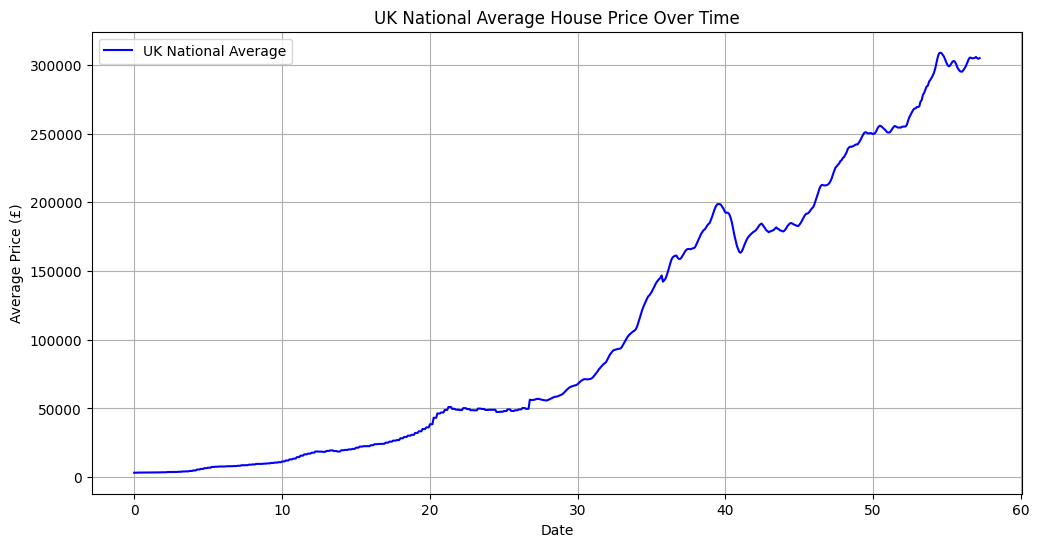

In [7]:
df['Years'] = (df['Date'] - df['Date'].min()).dt.days / 365.0

# Compute national average per date
national_avg = df.groupby("Years")["AveragePrice"].mean()

# # Step 1: Convert datetime to numeric (days since first date)
# df['Days'] = (df['Date'] - df['Date'].min()).dt.days

# # Compute national average per date
# national_avg = df.groupby("Days")["AveragePrice"].mean()

# # Compute national average per date
# national_avg = df.groupby("Date")["AveragePrice"].mean()

# Plot
plt.figure(figsize=(12,6))
plt.plot(national_avg.index, national_avg.values, label="UK National Average", color="blue")
plt.xlabel("Date")
plt.ylabel("Average Price (£)")
plt.title("UK National Average House Price Over Time")
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Sort latest dates by highest average price
latest = latest.sort_values(by=["AveragePrice"], ascending=False)

# Find top 3 regions
top_3 = latest.head(3)
print(top_3)

# Find bottom 3 regions
bot_3 = latest.tail(3)
print(bot_3)

# Combine the extremes into one dataframe
combined_df = pd.concat([top_3, bot_3])
print(combined_df["RegionName"])

ext_regions = []
for region, regiondata in combined_df.groupby("RegionName"):
    ext_regions.append(region)

print(ext_regions)

            Date              RegionName  AveragePrice
64868 2025-06-01  Kensington and Chelsea       1462800
28289 2025-06-01     City of Westminster       1035323
18227 2025-06-01                  Camden        876065
             Date           RegionName  AveragePrice
16031  2025-06-01              Burnley        123215
135872 2025-06-01  West Dunbartonshire        122248
63038  2025-06-01           Inverclyde        112288
64868     Kensington and Chelsea
28289        City of Westminster
18227                     Camden
16031                    Burnley
135872       West Dunbartonshire
63038                 Inverclyde
Name: RegionName, dtype: object
['Burnley', 'Camden', 'City of Westminster', 'Inverclyde', 'Kensington and Chelsea', 'West Dunbartonshire']


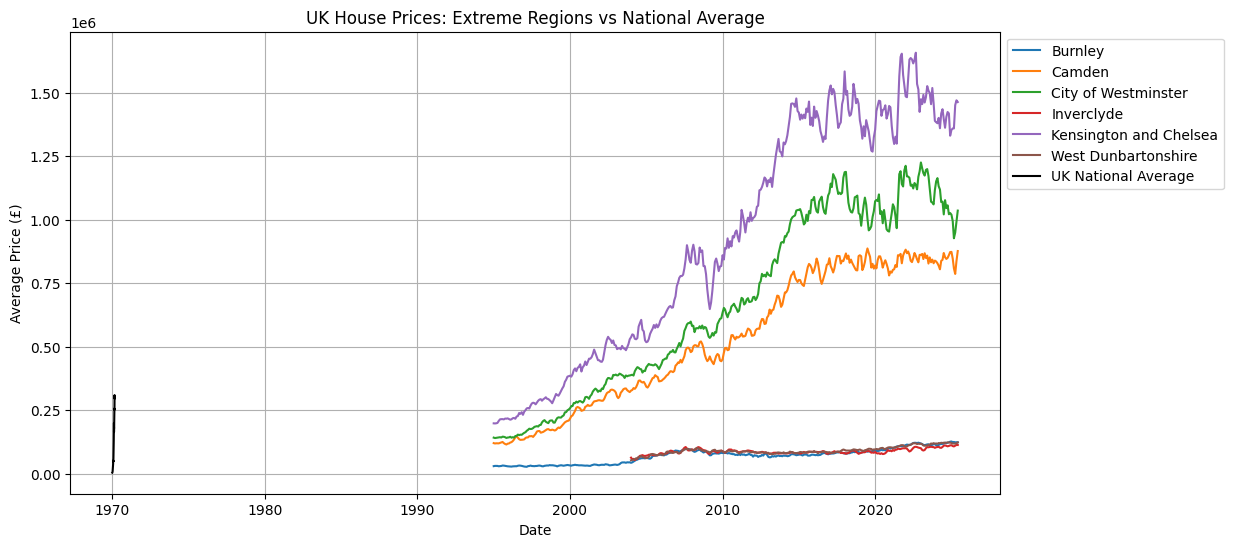

In [9]:
# Plot setup
plt.figure(figsize=(12,6))

# Plot each region
for region, region_data in df.groupby("RegionName"):
    if region in ext_regions:
        plt.plot(region_data["Date"], region_data["AveragePrice"], label=region)

# Plot national average on top
plt.plot(national_avg.index, national_avg.values, label="UK National Average", color="black")

# Labels and title
plt.xlabel("Date")
plt.ylabel("Average Price (£)")
plt.title("UK House Prices: Extreme Regions vs National Average")
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.grid(True)
plt.show()

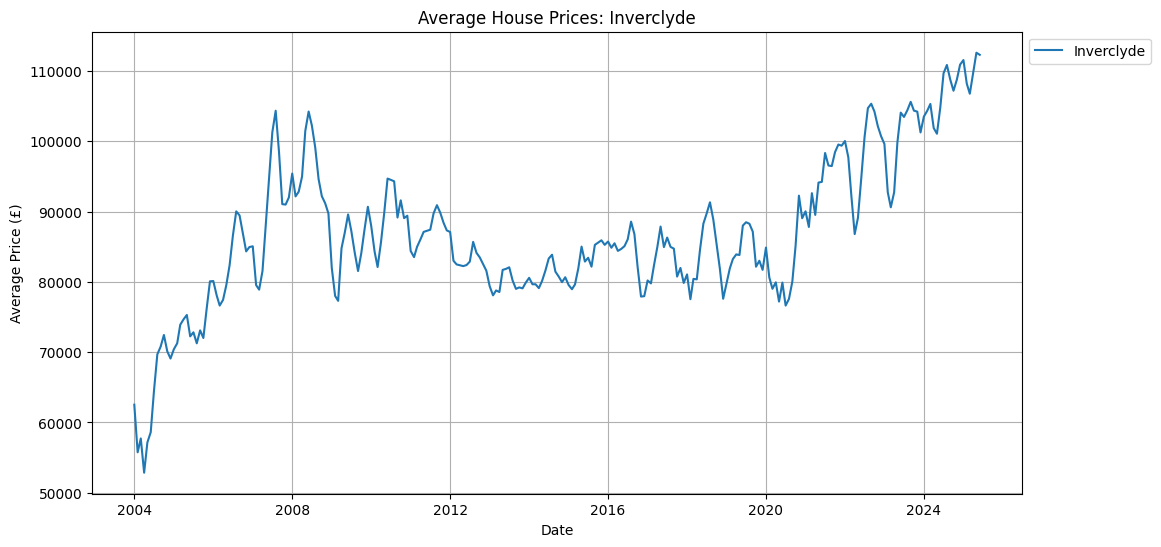

In [10]:
# Plot setup
plt.figure(figsize=(12,6))

# Plot each region
for region, region_data in df.groupby("RegionName"):
    if region == "Inverclyde":
        plt.plot(region_data["Date"], region_data["AveragePrice"], label=region)

# Labels and title
plt.xlabel("Date")
plt.ylabel("Average Price (£)")
plt.title("Average House Prices: Inverclyde")
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.grid(True)
plt.show()

In [11]:
# Define the non-linear function to fit
def exponential_growth(x, a, b, c):
    """
    An exponential growth function: y = a * exp(b * x) + c
    a: amplitude
    b: growth constant
    c: offset
    """
    return a * np.exp(b * x) + c

def quadratic(x, a, b, c):
    """
    A quadratic function: y = ax^2 + bx + c
    a: quadratic coefficient
    b: linear coefficient
    c: constant term
    """
    return a * x**2 + b * x + c

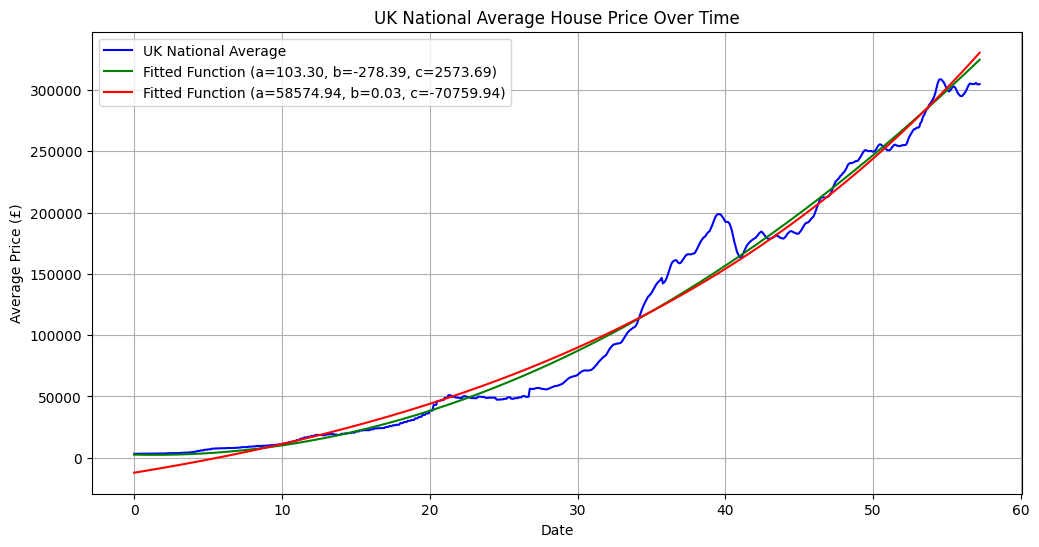

Fitted parameters: a=58574.9438, b=0.0336, c=-70759.9356


In [12]:
# Perform the non-linear regression using curve_fit
# Provide initial guess values for the parameters (optional but recommended)
initial_guesses = [1, 0.1, 0]
quad_params, quad_covariance = curve_fit(quadratic, national_avg.index, national_avg.values, p0=initial_guesses)

# Extract the fitted parameters
quad_a_fit, quad_b_fit, quad_c_fit = quad_params

# 4. Generate the fitted curve
quad_y_fit = quadratic(national_avg.index, quad_a_fit, quad_b_fit, quad_c_fit)


# Perform the non-linear regression using curve_fit
# Provide initial guess values for the parameters (optional but recommended)
initial_guesses = [1, 0.1, 0]
params, covariance = curve_fit(exponential_growth, national_avg.index, national_avg.values, p0=initial_guesses)

# Extract the fitted parameters
a_fit, b_fit, c_fit = params

# 4. Generate the fitted curve
y_fit = exponential_growth(national_avg.index, a_fit, b_fit, c_fit)


# 5. Visualise the results
plt.figure(figsize=(12, 6))
plt.plot(national_avg.index, national_avg.values, label="UK National Average", color="blue")
# plt.scatter(national_avg.index, national_avg.values, label='Noisy Data', s=20, alpha=0.7)
# plt.plot(national_avg.index, y_true, label='True Function (Ideal)', color='green', linestyle='--')
plt.plot(national_avg.index, quad_y_fit, label=f'Fitted Function (a={quad_a_fit:.2f}, b={quad_b_fit:.2f}, c={quad_c_fit:.2f})', color='green')
plt.plot(national_avg.index, y_fit, label=f'Fitted Function (a={a_fit:.2f}, b={b_fit:.2f}, c={c_fit:.2f})', color='red')
plt.xlabel("Date")
plt.ylabel("Average Price (£)")
# plt.title('Non-Linear Regression: Exponential Growth')
plt.title("UK National Average House Price Over Time")
plt.legend()
plt.grid(True)
plt.show()

print(f"Fitted parameters: a={a_fit:.4f}, b={b_fit:.4f}, c={c_fit:.4f}")
# print(f"True parameters: a={true_a:.4f}, b={true_b:.4f}, c={true_c:.4f}")

Visually it appears that the national average house price in the UK models best to a quadratic equation as opposed to an exponential equation. Below we calculate the residuals and RMSE to confirm this.

In [13]:
residuals = national_avg.values - y_fit
quad_residuals = national_avg.values - quad_y_fit

mse = np.mean(residuals**2)
quad_mse = np.mean(quad_residuals**2)

rmse = np.sqrt(mse)
quad_rmse = np.sqrt(quad_mse)

print(f"RMSE: {rmse:.2f}")
print(f"Quadratic RMSE: {quad_rmse:.2f}")

RMSE: 14618.71
Quadratic RMSE: 12766.73
